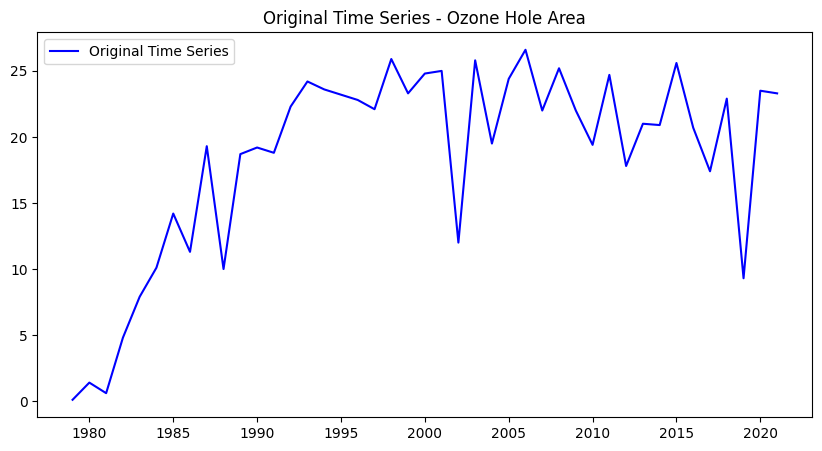

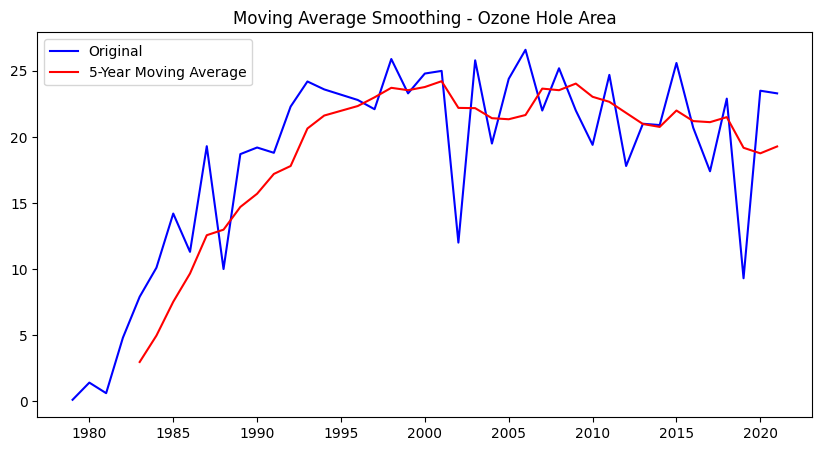

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


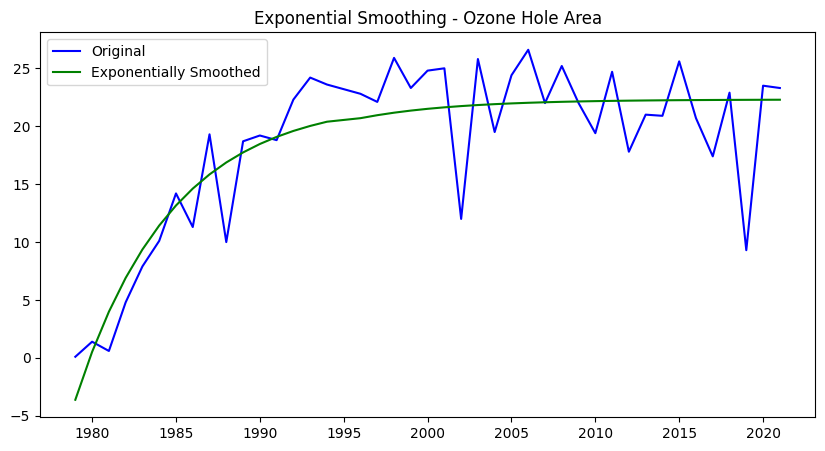

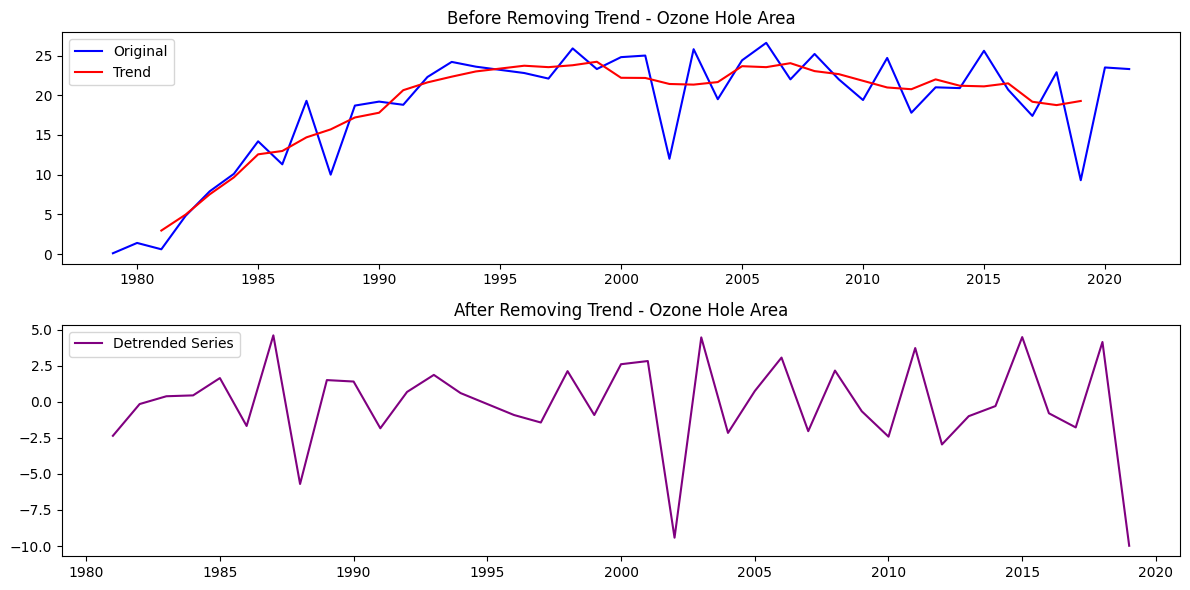

Trend removal and smoothing applied successfully!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

file_path = '/content/OzoneHole_Data.csv'
ozone_df = pd.read_csv(file_path)

ozone_df["Year"] = pd.to_datetime(ozone_df["Year"], format='%Y')
ozone_df.set_index("Year", inplace=True)

time_series = ozone_df["Hole Area"]

plt.figure(figsize=(10, 5))
plt.plot(time_series, label='Original Time Series', color='blue')
plt.title('Original Time Series - Ozone Hole Area')
plt.legend()
plt.show()

window_size = 5
rolling_mean = time_series.rolling(window=window_size).mean()

plt.figure(figsize=(10,5))
plt.plot(time_series, label='Original', color='blue')
plt.plot(rolling_mean, label=f'{window_size}-Year Moving Average', color='red')
plt.title('Moving Average Smoothing - Ozone Hole Area')
plt.legend()
plt.show()

exp_smooth = ExponentialSmoothing(time_series, trend='add', seasonal=None, damped_trend=True).fit()
ozone_df['Smoothed'] = exp_smooth.fittedvalues

plt.figure(figsize=(10,5))
plt.plot(time_series, label='Original', color='blue')
plt.plot(ozone_df['Smoothed'], label='Exponentially Smoothed', color='green')
plt.title('Exponential Smoothing - Ozone Hole Area')
plt.legend()
plt.show()

decomposition = seasonal_decompose(time_series, model='additive', period=5)
trend = decomposition.trend
detrended_series = time_series - trend

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(time_series, label='Original', color='blue')
plt.plot(trend, label='Trend', color='red')
plt.title('Before Removing Trend - Ozone Hole Area')
plt.legend()

plt.subplot(2,1,2)
plt.plot(detrended_series, label='Detrended Series', color='purple')
plt.title('After Removing Trend - Ozone Hole Area')
plt.legend()
plt.tight_layout()
plt.show()

print("Trend removal and smoothing applied successfully!")
